In [15]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
input_dir = '../input/'
working_dir = '../working/'
output_dir = '../output/'

# Read Track data

In [48]:
def read_track(line_name='a'):
    track_df = pd.read_csv(os.path.join(input_dir, 'track_{}.csv'.format(line_name.upper())))
    col_names_track = ['date', 'kilo', 'lev_l', 'lev_r', 'cur_l', 'cur_r', 'cant', 'width', 'speed']
    track_df.columns = col_names_track
    track_df['date'] = pd.to_datetime(track_df['date'])
    print('shape: {}'.format(track_df.shape))
    return track_df

In [49]:
track_a = read_track('a')
track_a.head()

shape: (10185690, 9)


,date,kilo,lev_l,lev_r,cur_l,cur_r,cant,width,speed
0,2017-04-01,10000,-1.16,-0.23,1.20,1.20,0.83,3.89,84.0
1,2017-04-01,10001,-1.17,-0.30,1.88,1.88,0.67,4.63,84.0
2,2017-04-01,10002,-1.09,-0.19,2.30,2.30,0.50,5.33,84.0
3,2017-04-01,10003,-0.64,0.20,2.28,2.28,0.46,5.90,84.0
4,2017-04-01,10004,0.47,0.89,1.74,1.74,0.62,6.38,84.5


In [17]:
track_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10185690 entries, 0 to 10185689
Data columns (total 9 columns):
date     datetime64[ns]
kilo     int64
lev_l    float64
lev_r    float64
cur_l    float64
cur_r    float64
cant     float64
width    float64
speed    float64
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 699.4 MB


In [18]:
track_a.describe()

,kilo,lev_l,lev_r,cur_l,cur_r,cant,width,speed
count,1.018569e+07,7.470943e+06,7.471012e+06,7.446377e+06,7.446377e+06,7.446377e+06,7.446377e+06,7.972145e+06
mean,2.395250e+04,1.567537e-03,2.756957e-03,5.495526e-03,-2.827986e-03,-4.965998e-03,-1.879153e-02,7.501464e+01
std,8.055769e+03,1.773254e+00,1.825382e+00,1.239223e+00,1.270356e+00,1.251522e+00,1.499319e+00,1.951427e+01
min,1.000000e+04,-2.607000e+01,-2.559000e+01,-8.474000e+01,-8.644000e+01,-1.815000e+01,-3.843000e+01,0.000000e+00
25%,1.697600e+04,-9.400000e-01,-9.700000e-01,-6.100000e-01,-6.300000e-01,-5.500000e-01,-6.400000e-01,6.600000e+01
50%,2.395250e+04,1.000000e-02,1.000000e-02,3.000000e-02,2.000000e-02,-1.000000e-02,-1.000000e-02,8.100000e+01
75%,3.092900e+04,9.400000e-01,9.800000e-01,6.500000e-01,6.600000e-01,5.500000e-01,6.200000e-01,8.900000e+01
max,3.790500e+04,9.388000e+01,9.358000e+01,1.486700e+02,1.462800e+02,1.249000e+01,2.478000e+01,1.020000e+02


In [54]:
track_a.isnull().sum()

date           0
kilo           0
lev_l    2714747
lev_r    2714678
cur_l    2739313
cur_r    2739313
cant     2739313
width    2739313
speed    2213545
dtype: int64

In [33]:
track_a_10000_apl = track_a.query('kilo==10000&date<"2017-10-01"')

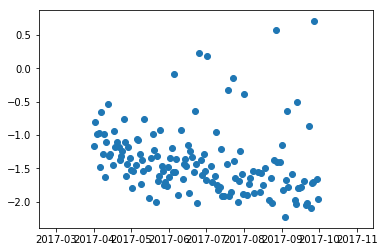

In [34]:
fig, ax = plt.subplots()
ax.scatter(track_a_10000_apl['date'].values, track_a_10000_apl['lev_l'])

# Read Equipment data

In [50]:
def read_equ(line_name='a'):
    equ_df = pd.read_csv(os.path.join(input_dir, 'equipment_{}.csv'.format(line_name.upper())))
    col_names_equ = ['kilo', 'is_ballast', 'is_long', 'sleeper_type', 'is_bridge', 'is_crossing', 'gross_ton', 'radius', 'is_unreliable']
    equ_df.columns = col_names_equ
    print('shape: {}'.format(equ_df.shape))
    return equ_df

In [51]:
equ_a = read_equ('a')
equ_a.head()

shape: (27906, 9)


,kilo,is_ballast,is_long,sleeper_type,is_bridge,is_crossing,gross_ton,radius,is_unreliable
0,10000,1,1,3,0,0,13.607,0,1
1,10001,1,1,3,0,0,13.607,0,1
2,10002,1,1,3,0,0,13.607,0,1
3,10003,1,1,3,0,0,13.607,0,1
4,10004,1,1,1,0,0,13.607,0,1


In [53]:
equ_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27906 entries, 0 to 27905
Data columns (total 9 columns):
kilo             27906 non-null int64
is_ballast       27906 non-null int64
is_long          27906 non-null int64
sleeper_type     27906 non-null int64
is_bridge        27906 non-null int64
is_crossing      27906 non-null int64
gross_ton        27906 non-null float64
radius           27906 non-null int64
is_unreliable    27906 non-null int64
dtypes: float64(1), int64(8)
memory usage: 1.9 MB


In [52]:
equ_a.describe()

,kilo,is_ballast,is_long,sleeper_type,is_bridge,is_crossing,gross_ton,radius,is_unreliable
count,27906.000000,27906.000000,27906.000000,27906.000000,27906.000000,27906.000000,27906.000000,27906.000000,27906.000000
mean,23952.500000,0.597076,0.882857,1.232925,0.023830,0.005734,9.921285,1194.178134,0.183760
std,8055.912642,0.490495,0.321597,0.953346,0.152522,0.075504,3.081020,4047.880744,0.387295
min,10000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16976.250000,0.000000,1.000000,1.000000,0.000000,0.000000,8.456000,0.000000,0.000000
50%,23952.500000,1.000000,1.000000,1.000000,0.000000,0.000000,11.059000,1000.000000,0.000000
75%,30928.750000,1.000000,1.000000,1.000000,0.000000,0.000000,11.579000,1000.000000,0.000000
max,37905.000000,1.000000,1.000000,8.000000,1.000000,1.000000,13.607000,70000.000000,1.000000


In [55]:
equ_a.isnull().sum()

kilo             0
is_ballast       0
is_long          0
sleeper_type     0
is_bridge        0
is_crossing      0
gross_ton        0
radius           0
is_unreliable    0
dtype: int64